# Beta Distribution

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.

---


The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union

The probability density function of the beta distribution for $x \in [0,1]$ can be written as:
$$p(x|\alpha, \beta) = x^{\alpha -1} (1-x)^{\beta -1} \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)},$$

In [14]:
from scipy.integrate import quad

class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        
        self.alpha = alpha
        self.beta = beta

        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        
        return self.__unnormalized_pdf(x) / self.__calculate_normalization_constant()

        ######################  TODO  ########################

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################

        return x**(self.alpha - 1) * (1 - x)**(self.beta - 1)
    
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach

        f = lambda x: x**(self.alpha - 1) * (1 - x)**(self.beta - 1) 
        beta_constant, error_ = quad(f, 0, 1)
        return beta_constant

        ######################  TODO  ########################

In [ ]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    ######################  TODO  ########################
    plt.plot(x := np.linspace(0, 1, 1000), beta.pdf(x), label=f'alpha = {beta.alpha}, beta = {beta.beta}', color='steelblue')
    plt.title('Beta Distribution PDF')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend(loc='upper right')
    plt.grid(True)
    ######################  TODO  ######################## 

## Initial Assumptions and Methodology:

In this problem, we aim to estimate the probability of getting heads (p) in a sequence of coin flips using the Beta distribution and Bayesian inference. Here's how we address the task:

1. **Prior Belief:**
Initially, we assume no prior information about p. Hence, we start with a uniform Beta distribution, Beta(1, 1), where α=1 and β=1.
This represents a non-informative prior, indicating equal likelihood for any value of p between 0 and 1.

2. **Posterior Distribution:**
After each observation, the posterior distribution is calculated using the prior and likelihood. The Beta distribution is a conjugate prior for the Bernoulli likelihood, so the posterior remains a Beta distribution: Beta(α′, β′)= Beta(α+heads, β+tails) where, α is incremented for each head observed, and β is incremented for each tail observed.

* We will first Begin with Beta(1,1) for the first part of the problem. Later, for comparison, we use Beta(4,10) as an alternative prior.

It is important to note that For each coin flip (in this project for every 50 coin flips):
1. We will count the total heads (h) and tails (t) observed so far.
2. Then we will update the posterior parameters (as mentioned): 
    * α(new) = α(prior) + head
    * β(new) = β(prior) + tail

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [26]:
######################  TODO  ########################

with open('data\\coin_flips.txt', 'r') as file:
    flips = file.read().strip()

flips = flips.split('\n')

######################  TODO  ########################

## Prior: Uniform

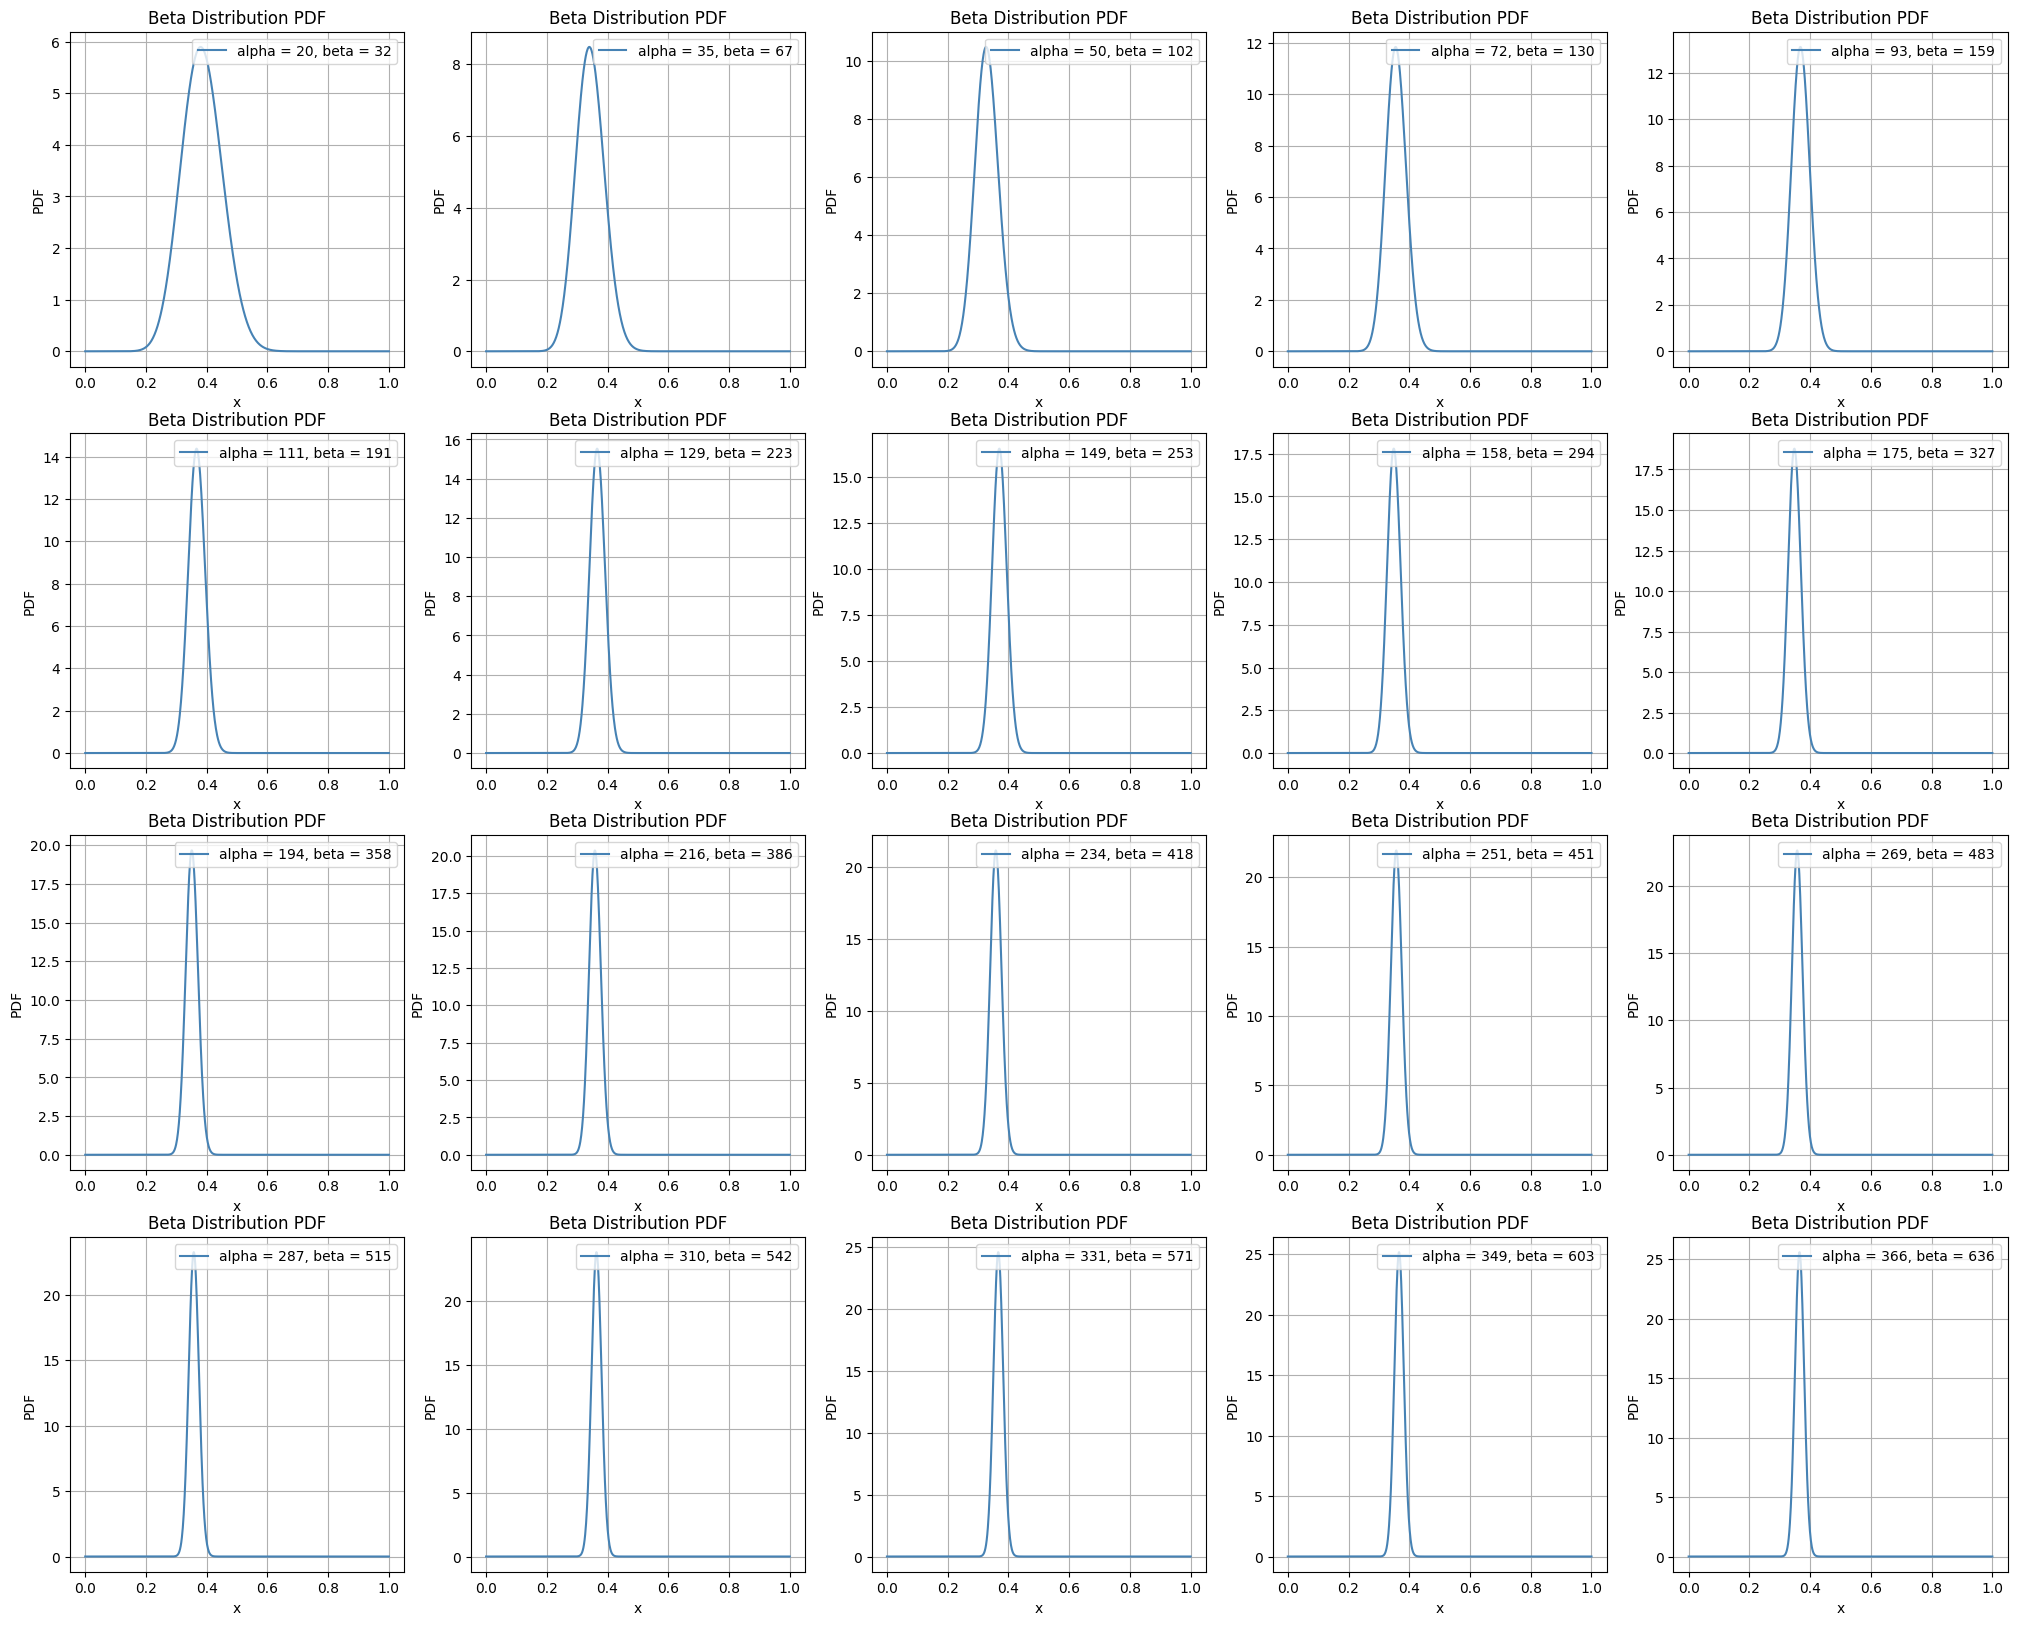

In [49]:
######################  TODO  ########################

plt.figure(figsize=(25, 20))
subplot = 1

for i in range(0, len(flips), 50):
    trials = flips[0:i+50]
    h = trials.count('H')
    t = trials.count('T')

    plt.subplot(4, 5, subplot)
    subplot += 1
    
    plot_beta_dist(BetaDistribution(h + 1, t + 1))

plt.show()
    
######################  TODO  ########################

Now calculate the final posterior mean and variance.

* #### **Mean:**
$$\mu = \frac{\alpha}{\alpha + \beta}$$


* #### **Variance:**
$$\sigma^2 = \frac{\alpha \cdot \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)}$$

In [60]:
######################  TODO  ########################

h_final = flips.count("H")
t_final = flips.count("T")

alpha_final = h_final + 1
beta_final = t_final + 1

mean_final = alpha_final / (alpha_final + beta_final)
variance_final = (alpha_final * beta_final) / ((alpha_final + beta_final) ** 2 * (alpha_final + beta_final + 1))

print("Final Posterior Mean in uniform prior assumption:", mean_final)
print("Final Posterior Variance in uniform prior assumption:", variance_final)

######################  TODO  ########################

Final Posterior Mean in uniform prior assumption: 0.3652694610778443
Final Posterior Variance in uniform prior assumption: 0.00023115421922407326


## Prior: $Beta(4, 10)$

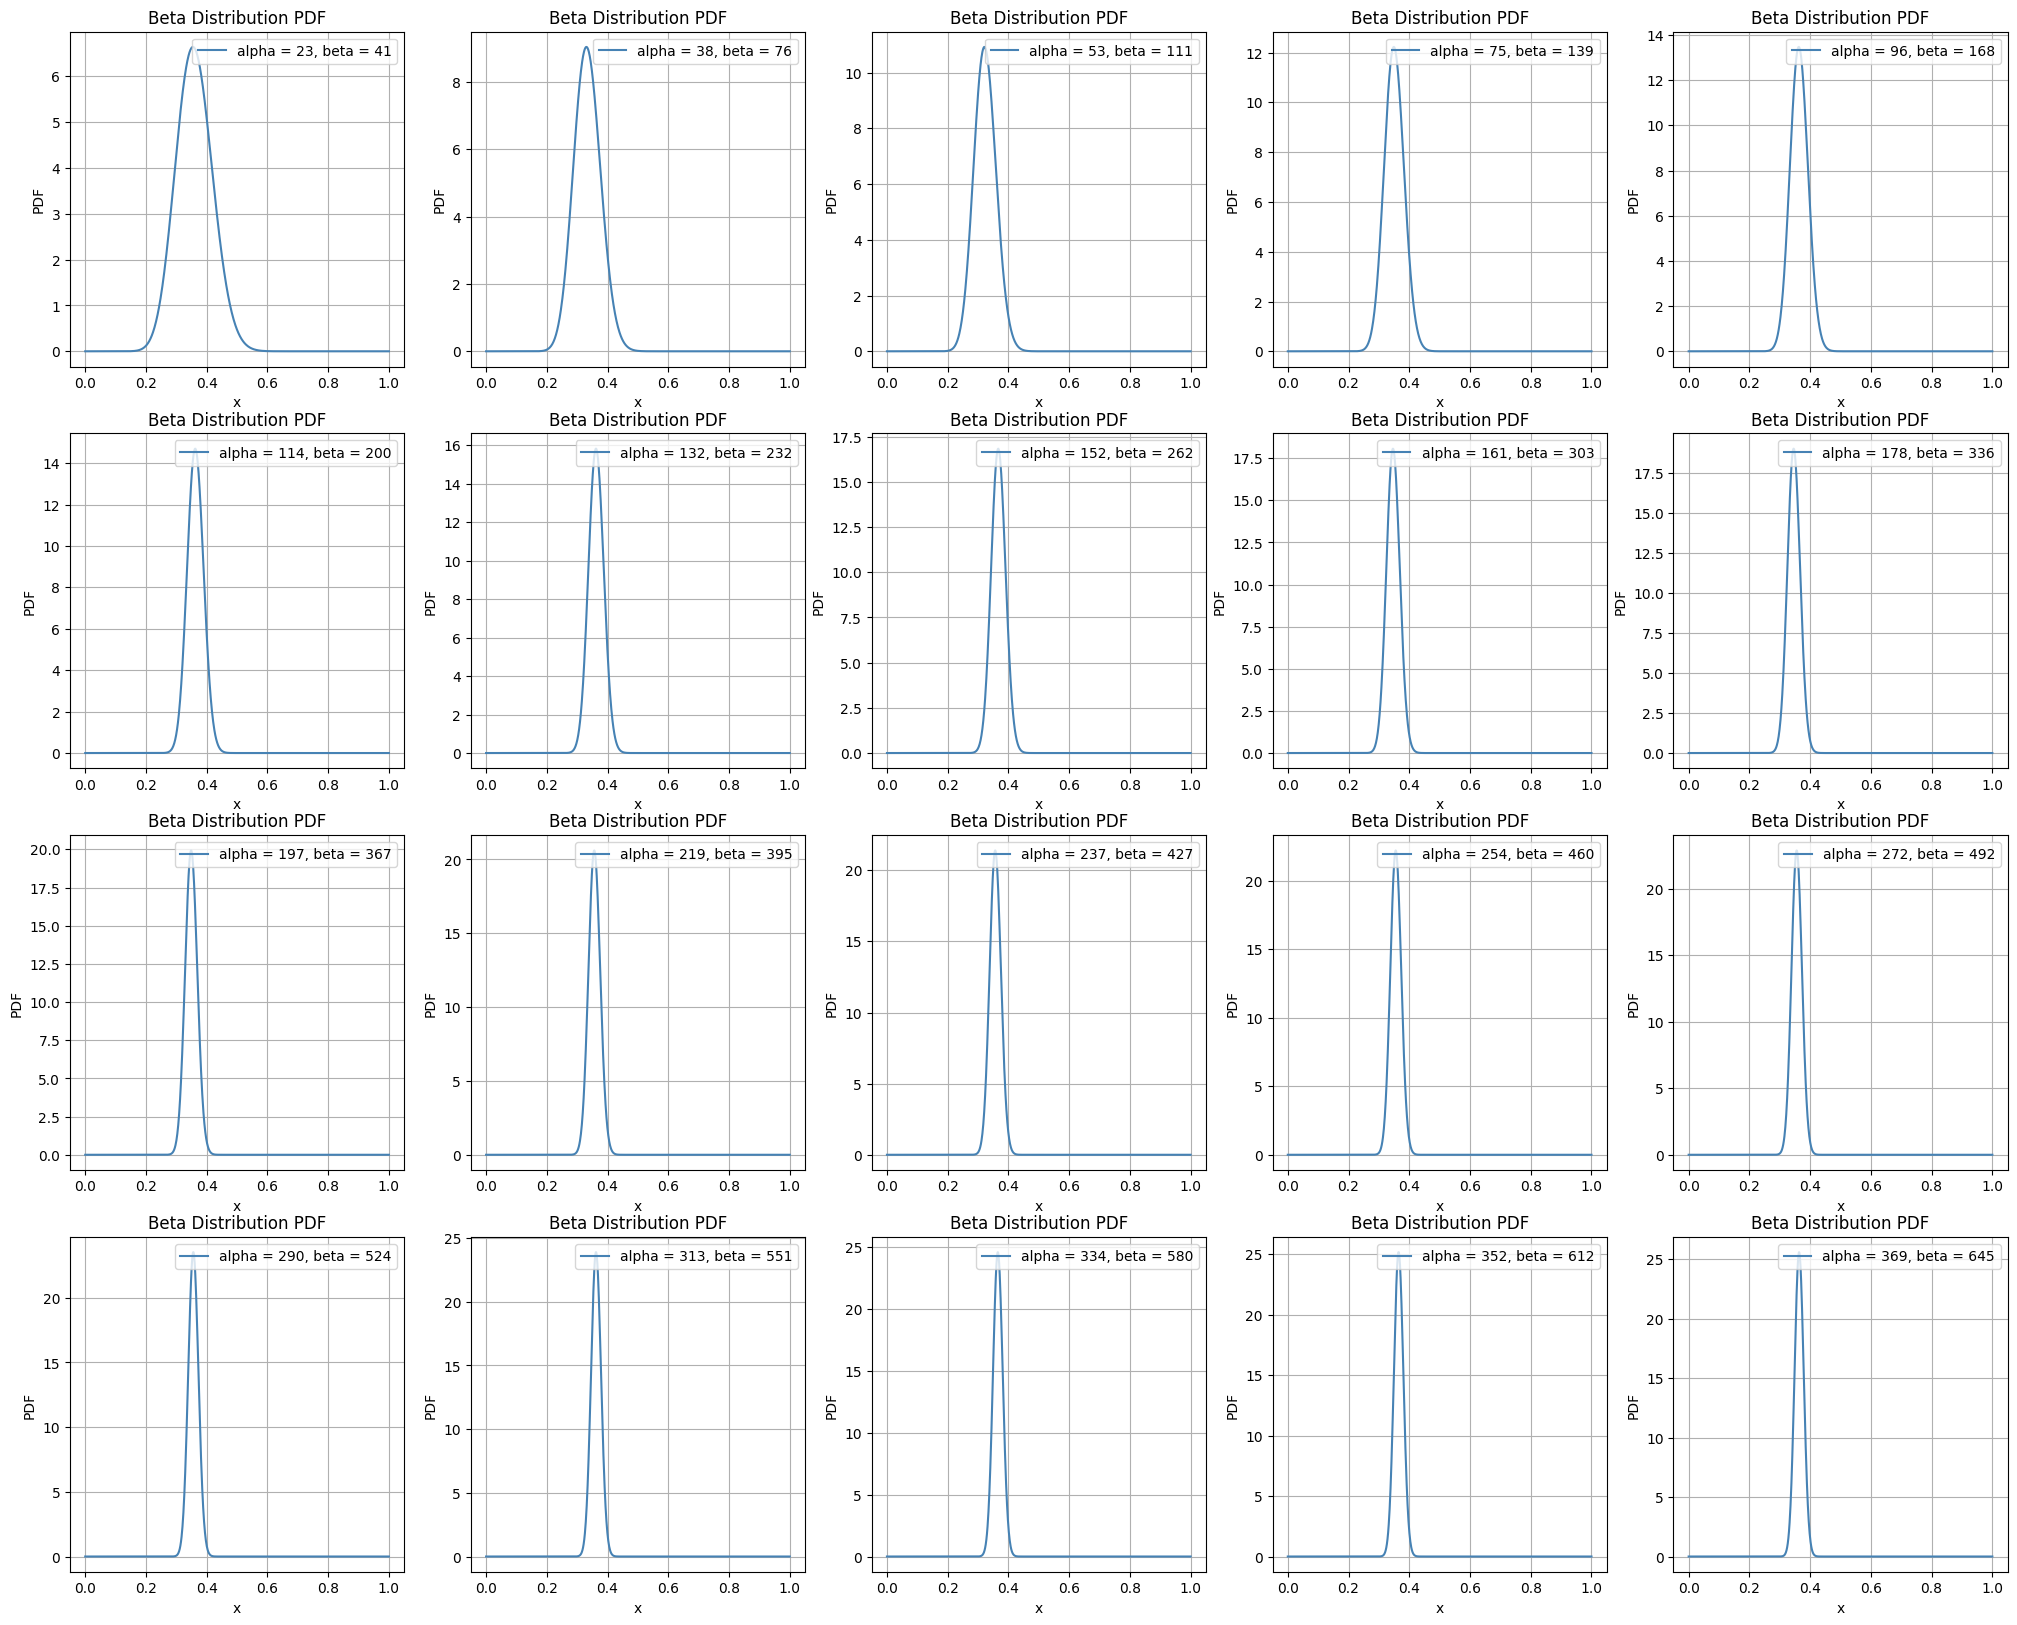

In [58]:
######################  TODO  ########################

plt.figure(figsize=(25, 20))
subplot = 1

for i in range(0, len(flips), 50):
    trials = flips[0:i+50]
    h = trials.count('H')
    t = trials.count('T')

    plt.subplot(4, 5, subplot)
    subplot += 1
    
    plot_beta_dist(BetaDistribution(h + 4, t + 10))

plt.show()

######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [61]:
######################  TODO  ########################

alpha_final = h_final + 4
beta_final = t_final + 10

mean_final = alpha_final / (alpha_final + beta_final)
variance_final = (alpha_final * beta_final) / ((alpha_final + beta_final) ** 2 * (alpha_final + beta_final + 1))

print("Final Posterior Mean for Beta(4, 10) prior assumption:", mean_final)
print("Final Posterior Variance for Beta(4, 10) prior assumption:", variance_final)

######################  TODO  ########################

Final Posterior Mean for Beta(4, 10) prior assumption: 0.363905325443787
Final Posterior Variance for Beta(4, 10) prior assumption: 0.0002280573788743236


## Results from Comparing the Two Prior assumptions:
* The means are very close. However, the mean for the informative prior (Beta(4, 10)) is slightly lower, reflecting the prior belief that the probability of heads is biased towards values less than 0.5.
* The variances are also very close. The slightly lower variance in the informative prior case suggests that incorporating prior information reduced the uncertainty in the final estimate.

**Conclusion:**
1. Incorporating a prior assumption (Beta(4,10)) slightly shifts the posterior mean and reduces the variance. This demonstrates how a prior belief can refine the estimate and reduce uncertainty, even when the data (number of trials in this particular case) is abundant.
2. The small differences confirm that Bayesian inference is robust to prior assumptions when sufficient data is available. However, in cases with limited data, the choice of prior would have a more significant impact.